In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
import statsmodels.api as sm
import os
import datetime as dt

In [47]:
park_KY = pd.read_csv('C:\\Users\\user1\\Desktop\\창원_빅데이터_공모전\\Changwon_BigData_Competition\\Raw_data\\park_Changwon.csv',encoding='cp949')
park_KY.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,48170-00011,가호2어린이공원,어린이공원,-,경상남도 진주시 가좌동 1438-7,35.158705,128.106265,855.0,-,"그네, 조합놀이대",-,-,-,1985-04-16,경상남도 진주시청,055-749-5931,2019-10-17,5310000,경상남도 진주시
1,48170-00122,초장1지구 역사공원,역사공원,-,경상남도 진주시 초전동 1664,35.211528,128.105637,4849.0,-,-,-,-,-,2014-05-22,경상남도 진주시청,055-749-5931,2019-10-17,5310000,경상남도 진주시
2,48170-00121,물빛여울공원,문화공원,경상남도 진주시 에나로128번길 14,경상남도 진주시 충무공동 291,35.175809,128.142738,13162.0,-,-,주차장,전시관,-,2014-12-01,경상남도 진주시청,055-749-5931,2019-10-17,5310000,경상남도 진주시
3,48170-00120,평거17어린이공원,어린이공원,경상남도 진주시 남강로 373번길 3,경상남도 진주시 평거동 794-2번지 일원,35.172144,128.067875,1500.0,-,-,공중화장실,-,자전거대여소,2012-10-25,경상남도 진주시청,055-749-5931,2019-10-17,5310000,경상남도 진주시
4,48170-00119,평거16어린이공원,어린이공원,-,경상남도 진주시 신안동 708-3번지 일원,35.177248,128.070662,1500.0,-,-,-,-,분수대,2012-10-25,경상남도 진주시청,055-749-5931,2019-10-17,5310000,경상남도 진주시


In [48]:
park_KY.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편의시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [49]:
# 분석에 불필요한 변수 제거 
park_KY.drop(['관리번호','지정고시일','전화번호','데이터기준일자','제공기관코드','제공기관명'],axis=1, inplace=True)
park_KY.head()

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명
0,가호2어린이공원,어린이공원,-,경상남도 진주시 가좌동 1438-7,35.158705,128.106265,855.0,-,"그네, 조합놀이대",-,-,-,경상남도 진주시청
1,초장1지구 역사공원,역사공원,-,경상남도 진주시 초전동 1664,35.211528,128.105637,4849.0,-,-,-,-,-,경상남도 진주시청
2,물빛여울공원,문화공원,경상남도 진주시 에나로128번길 14,경상남도 진주시 충무공동 291,35.175809,128.142738,13162.0,-,-,주차장,전시관,-,경상남도 진주시청
3,평거17어린이공원,어린이공원,경상남도 진주시 남강로 373번길 3,경상남도 진주시 평거동 794-2번지 일원,35.172144,128.067875,1500.0,-,-,공중화장실,-,자전거대여소,경상남도 진주시청
4,평거16어린이공원,어린이공원,-,경상남도 진주시 신안동 708-3번지 일원,35.177248,128.070662,1500.0,-,-,-,-,분수대,경상남도 진주시청


In [50]:
park_KY[park_KY['소재지지번주소']=='-']
## 소재지지번주소의 결측치가 2개뿐이고 창원시는 결측치가 없으므로 소재지지번주소를 기준으로 창원시 추출

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명
387,대치공원,근린공원,경상남도 함안군 칠서면 향촌길 20,-,35.363432,128.488949,14449.0,족구경기장 4,-,관리동 1동,-,벤치,경상남도 함안군청
390,사적공원,근린공원,경상남도 함안군 가야읍 도항1길 46-8,-,35.280446,128.406466,12840.0,-,-,-,기념동,벤치,경상남도 함안군청


In [51]:
# 경상남도의 공원 목록이기 때문에 창원시만 추출 (1000개)
park_Changwon = park_KY[park_KY['소재지지번주소'].str.contains('창원시')]
park_Changwon.reset_index(inplace=True)
del park_Changwon['index']
park_Changwon.head()

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명
0,꿈동산,어린이공원,경상남도 창원시 의창구 봉곡동 5,경상남도 창원시 의창구 봉곡동 5,35.248733,128.655473,691.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-,경상남도 창원시청
1,무동3호,어린이공원,경상남도 창원시 의창구 북면 무동리 121-4,경상남도 창원시 의창구 북면 무동리 121-4,35.319959,128.581953,10114.0,-,-,-,-,-,경상남도 창원시청
2,가람공원(어린이공원33),어린이공원,경상남도 창원시 진해구 용원동 1339-4,경상남도 창원시 진해구 용원동 1339-4,35.087521,128.813516,3025.0,-,"조합놀이대, 시소, 흔들놀이기구",-,-,-,경상남도 창원시청
3,국화,어린이공원,경상남도 창원시 의창구 도계동 341-3,경상남도 창원시 의창구 도계동 341-3,35.259182,128.636181,1599.0,-,"조합놀이대1, 그네1, 흔들기구1",-,-,-,경상남도 창원시청
4,개나리,어린이공원,경상남도 창원시 의창구 도계동 358-1,경상남도 창원시 의창구 도계동 358-1,35.260970,128.639965,1710.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-,경상남도 창원시청


In [52]:
# 변수 데이터 타입
park_Changwon.dtypes

공원명              object
공원구분             object
소재지도로명주소         object
소재지지번주소          object
위도              float64
경도              float64
공원면적            float64
공원보유시설(운동시설)     object
공원보유시설(유희시설)     object
공원보유시설(편의시설)     object
공원보유시설(교양시설)     object
공원보유시설(기타시설)     object
관리기관명            object
dtype: object

In [53]:
# 결측치 확인 
for i in park_Changwon.columns:
    print(i,':',len(park_Changwon[park_Changwon[i]=='-']))

공원명 : 0
공원구분 : 0
소재지도로명주소 : 0
소재지지번주소 : 0
위도 : 0
경도 : 0
공원면적 : 0
공원보유시설(운동시설) : 837
공원보유시설(유희시설) : 412
공원보유시설(편의시설) : 806
공원보유시설(교양시설) : 931
공원보유시설(기타시설) : 739
관리기관명 : 0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [54]:
# 공원의 종류
park_Changwon['공원구분'].value_counts()

어린이공원    703
근린공원     189
소공원       79
체육공원      16
묘지공원       7
문화공원       6
Name: 공원구분, dtype: int64

In [55]:
park_Changwon['관리기관명'].value_counts()
## 관리기관명이 모두 같으므로 이 칼럼 제거 
park_Changwon.drop('관리기관명',axis=1,inplace=True)
park_Changwon.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설)
0,꿈동산,어린이공원,경상남도 창원시 의창구 봉곡동 5,경상남도 창원시 의창구 봉곡동 5,35.248733,128.655473,691.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-
1,무동3호,어린이공원,경상남도 창원시 의창구 북면 무동리 121-4,경상남도 창원시 의창구 북면 무동리 121-4,35.319959,128.581953,10114.0,-,-,-,-,-
2,가람공원(어린이공원33),어린이공원,경상남도 창원시 진해구 용원동 1339-4,경상남도 창원시 진해구 용원동 1339-4,35.087521,128.813516,3025.0,-,"조합놀이대, 시소, 흔들놀이기구",-,-,-
3,국화,어린이공원,경상남도 창원시 의창구 도계동 341-3,경상남도 창원시 의창구 도계동 341-3,35.259182,128.636181,1599.0,-,"조합놀이대1, 그네1, 흔들기구1",-,-,-
4,개나리,어린이공원,경상남도 창원시 의창구 도계동 358-1,경상남도 창원시 의창구 도계동 358-1,35.260970,128.639965,1710.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-


In [56]:
park_Changwon[park_Changwon['공원보유시설(운동시설)']=='-']

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설)
0,꿈동산,어린이공원,경상남도 창원시 의창구 봉곡동 5,경상남도 창원시 의창구 봉곡동 5,35.248733,128.655473,691.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-
1,무동3호,어린이공원,경상남도 창원시 의창구 북면 무동리 121-4,경상남도 창원시 의창구 북면 무동리 121-4,35.319959,128.581953,10114.0,-,-,-,-,-
2,가람공원(어린이공원33),어린이공원,경상남도 창원시 진해구 용원동 1339-4,경상남도 창원시 진해구 용원동 1339-4,35.087521,128.813516,3025.0,-,"조합놀이대, 시소, 흔들놀이기구",-,-,-
3,국화,어린이공원,경상남도 창원시 의창구 도계동 341-3,경상남도 창원시 의창구 도계동 341-3,35.259182,128.636181,1599.0,-,"조합놀이대1, 그네1, 흔들기구1",-,-,-
4,개나리,어린이공원,경상남도 창원시 의창구 도계동 358-1,경상남도 창원시 의창구 도계동 358-1,35.260970,128.639965,1710.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-
5,진달래,어린이공원,경상남도 창원시 의창구 도계동 321-1,경상남도 창원시 의창구 도계동 321-1,35.262845,128.639413,1592.0,-,"조합놀이대1, 시소2, 그네1, 기타1",-,-,-
6,꿈동산,어린이공원,경상남도 창원시 의창구 봉곡동 5,경상남도 창원시 의창구 봉곡동 5,35.248733,128.655473,691.0,-,"조합놀이대1, 그네1, 흔들기구2",-,-,-
7,느티,어린이공원,경상남도 창원시 의창구 사림동 85-1,경상남도 창원시 의창구 사림동 85-1,35.246150,128.678759,1013.0,-,"조합놀이기구1, 그네1, 흔들놀이2, 회전놀이1",-,-,-
8,벼리,어린이공원,경상남도 창원시 의창구 도계동 892,경상남도 창원시 의창구 도계동 892,35.253496,128.639571,1895.0,-,"조합놀이대1, 그네1, 시소1, 흔들기구3",-,-,-
9,소망,어린이공원,경상남도 창원시 의창구 팔용동 140-1,경상남도 창원시 의창구 팔용동 140-1,35.255126,128.609208,1596.0,-,"조합놀이대1, 그네1, 회전놀이기구1, 오르는기구1",-,-,-


In [57]:
columns = ['공원보유시설(운동시설)','공원보유시설(유희시설)','공원보유시설(편의시설)','공원보유시설(교양시설)','공원보유시설(기타시설)']
for i in columns:
    park_Changwon[i] = park_Changwon[i].map(lambda x : 0 if x=='-' else 1)
park_Changwon.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설)
0,꿈동산,어린이공원,경상남도 창원시 의창구 봉곡동 5,경상남도 창원시 의창구 봉곡동 5,35.248733,128.655473,691.0,0,1,0,0,0
1,무동3호,어린이공원,경상남도 창원시 의창구 북면 무동리 121-4,경상남도 창원시 의창구 북면 무동리 121-4,35.319959,128.581953,10114.0,0,0,0,0,0
2,가람공원(어린이공원33),어린이공원,경상남도 창원시 진해구 용원동 1339-4,경상남도 창원시 진해구 용원동 1339-4,35.087521,128.813516,3025.0,0,1,0,0,0
3,국화,어린이공원,경상남도 창원시 의창구 도계동 341-3,경상남도 창원시 의창구 도계동 341-3,35.259182,128.636181,1599.0,0,1,0,0,0
4,개나리,어린이공원,경상남도 창원시 의창구 도계동 358-1,경상남도 창원시 의창구 도계동 358-1,35.260970,128.639965,1710.0,0,1,0,0,0


In [64]:
# 군집분석을 위한 변수 처리 
# 창원시 구별로 데이터를 구분하는 변수 생성 
park_Changwon['구'] = park_Changwon['소재지지번주소'].map(lambda x :x.split()[2])
# park_Changwon.rename({"소재지지번주소":'구'},inplace=True)
park_Changwon.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),구
0,꿈동산,어린이공원,경상남도 창원시 의창구 봉곡동 5,경상남도 창원시 의창구 봉곡동 5,35.248733,128.655473,691.0,0,1,0,0,0,의창구
1,무동3호,어린이공원,경상남도 창원시 의창구 북면 무동리 121-4,경상남도 창원시 의창구 북면 무동리 121-4,35.319959,128.581953,10114.0,0,0,0,0,0,의창구
2,가람공원(어린이공원33),어린이공원,경상남도 창원시 진해구 용원동 1339-4,경상남도 창원시 진해구 용원동 1339-4,35.087521,128.813516,3025.0,0,1,0,0,0,진해구
3,국화,어린이공원,경상남도 창원시 의창구 도계동 341-3,경상남도 창원시 의창구 도계동 341-3,35.259182,128.636181,1599.0,0,1,0,0,0,의창구
4,개나리,어린이공원,경상남도 창원시 의창구 도계동 358-1,경상남도 창원시 의창구 도계동 358-1,35.260970,128.639965,1710.0,0,1,0,0,0,의창구


In [65]:
park_Changwon.drop(['소재지도로명주소','소재지지번주소'],axis=1,inplace=True)

In [66]:
park_Changwon.head()

,공원명,공원구분,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),구
0,꿈동산,어린이공원,35.248733,128.655473,691.0,0,1,0,0,0,의창구
1,무동3호,어린이공원,35.319959,128.581953,10114.0,0,0,0,0,0,의창구
2,가람공원(어린이공원33),어린이공원,35.087521,128.813516,3025.0,0,1,0,0,0,진해구
3,국화,어린이공원,35.259182,128.636181,1599.0,0,1,0,0,0,의창구
4,개나리,어린이공원,35.260970,128.639965,1710.0,0,1,0,0,0,의창구


In [67]:
# 공원_id는 따로 저장해두기 
park_id = park_Changwon['공원명']

In [68]:
# park_Changwon데이터프레임에서 열 공원명 제거
park_Changwon.drop('공원명',axis=1,inplace=True)

In [71]:
# 범주형 변수들 더미화 시키기 
dummy_park_Changwon = pd.get_dummies(park_Changwon)
dummy_park_Changwon.head()

,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),공원구분_근린공원,공원구분_묘지공원,공원구분_문화공원,공원구분_소공원,공원구분_어린이공원,공원구분_체육공원,구_마산합포구,구_마산회원구,구_성산구,구_의창구,구_진해구
0,35.248733,128.655473,691.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,35.319959,128.581953,10114.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,35.087521,128.813516,3025.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35.259182,128.636181,1599.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35.260970,128.639965,1710.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [72]:
dummy_park_Changwon['공원명'] = park_id

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [76]:
X_features = dummy_park_Changwon.drop('공원명',axis=1)
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 5, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)
dummy_park_Changwon['cluster_label']=labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어 : 0.341


In [79]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, n_features=2,centers=4,cluster_std=1,
                center_box=(-10.0,10.0),shuffle=True,random_state=1)
# 군집 개수가 2,3,4,5개일 때의 군집별 실루엣 계수 평균값을 시각화
# visualize_silhouette([2,3,4,5],X)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3309055674266391
For n_clusters = 3 The average silhouette_score is : 0.2933001345927383
For n_clusters = 4 The average silhouette_score is : 0.28359939690597546
For n_clusters = 5 The average silhouette_score is : 0.34139602782433315


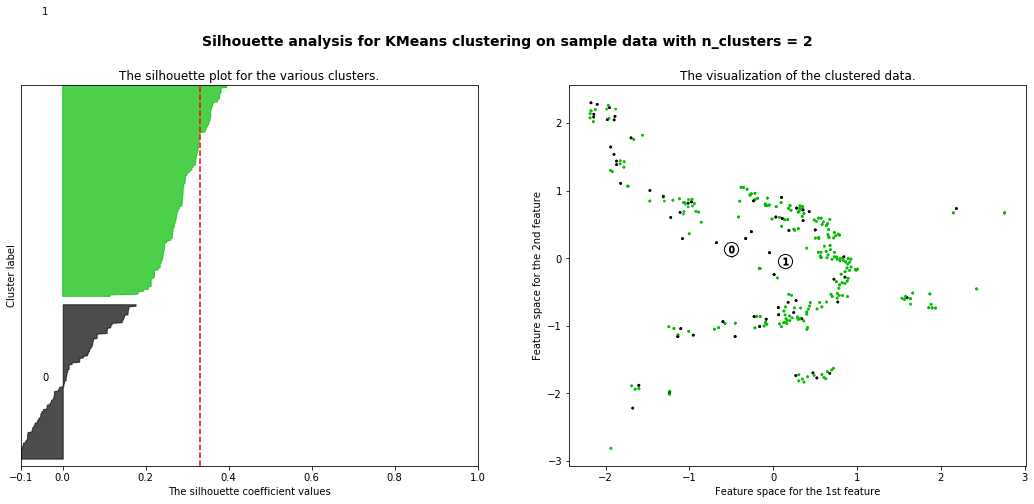

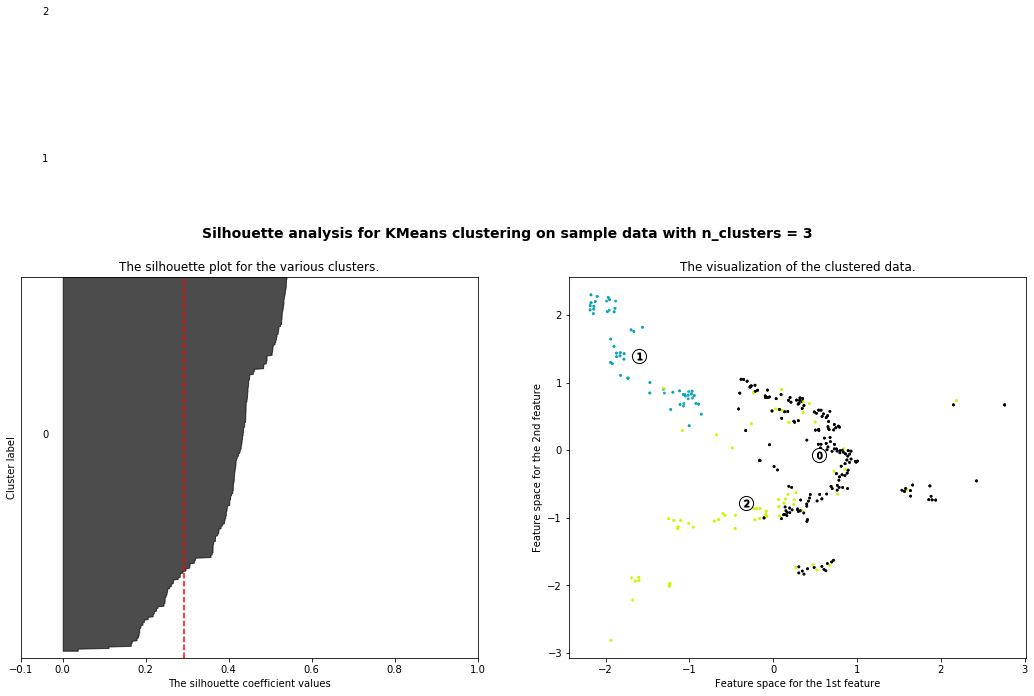

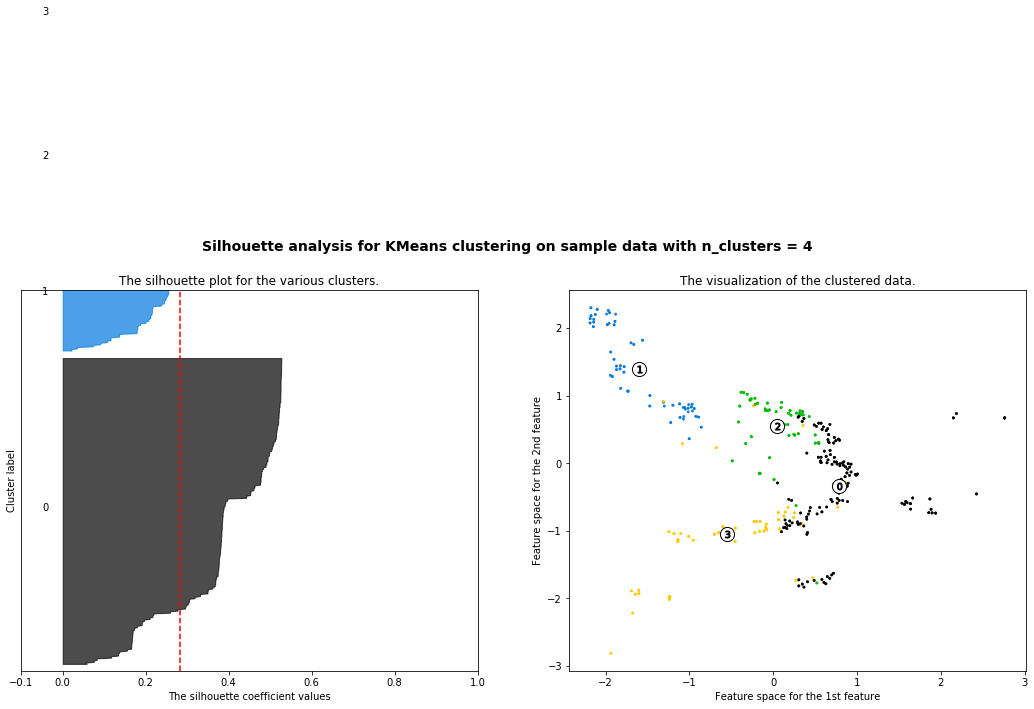

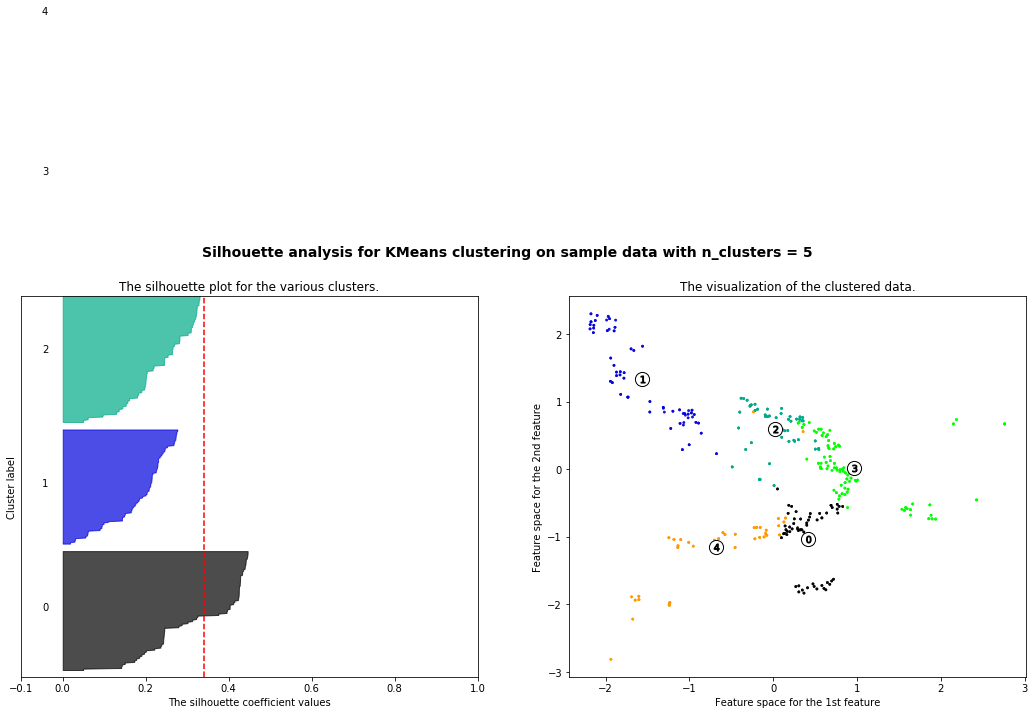

In [81]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_features_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_features_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_features_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_features_scaled[:, 0], X_features_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


In [82]:
# 최대 군집 생성 개수
n_iter_cluster = 10 
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = [] 
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(X_features_scaled)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster':cluster_range, 'Error':clus_error})
ds_error

,NumberofCluster,Error
0,1,19000.000000
1,2,16039.943078
2,3,14162.724242
3,4,12608.798886
4,5,11252.012873
5,6,10188.441448
6,7,9119.744321
7,8,8066.989675
8,9,7098.936456
9,10,5975.279469


Text(0, 0.5, 'Sum of squared distance')

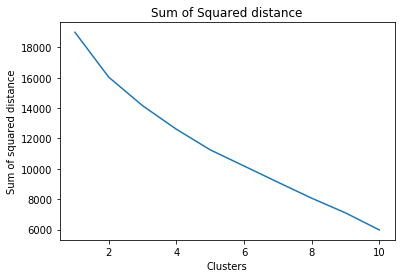

In [84]:
plt.figure(figsize=(6,4))
plt.plot(ds_error['NumberofCluster'],ds_error['Error'])
plt.title('Sum of Squared distance')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [90]:
clus = KMeans(5)
clus.fit(X_features_scaled)
cluster_kmeans=[i+1 for i in clus.labels_]
park_Changwon['공원명']=park_id
park_Changwon['ClusterKmeans'] = cluster_kmeans
park_Changwon[:30]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,공원구분,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편의시설),공원보유시설(교양시설),공원보유시설(기타시설),구,공원명,ClusterKmeans
0,어린이공원,35.248733,128.655473,691.0,0,1,0,0,0,의창구,꿈동산,2
1,어린이공원,35.319959,128.581953,10114.0,0,0,0,0,0,의창구,무동3호,2
2,어린이공원,35.087521,128.813516,3025.0,0,1,0,0,0,진해구,가람공원(어린이공원33),5
3,어린이공원,35.259182,128.636181,1599.0,0,1,0,0,0,의창구,국화,2
4,어린이공원,35.260970,128.639965,1710.0,0,1,0,0,0,의창구,개나리,2
5,어린이공원,35.262845,128.639413,1592.0,0,1,0,0,0,의창구,진달래,2
6,어린이공원,35.248733,128.655473,691.0,0,1,0,0,0,의창구,꿈동산,2
7,어린이공원,35.246150,128.678759,1013.0,0,1,0,0,0,의창구,느티,2
8,어린이공원,35.253496,128.639571,1895.0,0,1,0,0,0,의창구,벼리,2
9,어린이공원,35.255126,128.609208,1596.0,0,1,0,0,0,의창구,소망,2
